<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-выбросов" data-toc-modified-id="Обработка-выбросов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка выбросов</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Подготовка-данных-для-исследования" data-toc-modified-id="Подготовка-данных-для-исследования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных для исследования</a></span><ul class="toc-item"><li><span><a href="#Устранение-пропусков" data-toc-modified-id="Устранение-пропусков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Устранение пропусков</a></span></li></ul></li><li><span><a href="#Исследование-моделей-" data-toc-modified-id="Исследование-моделей--5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследование моделей <a id="models_research"></a></a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Итоги-проекта" data-toc-modified-id="Итоги-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоги проекта</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компании такси, необходимо построить модель машинного обучения (ML - machine learning) для привлечения большого количества водителей, в период пиковой нагрузки.


**Цель исследования**

   1. Необходимо построить модель машинного обучения (задача регрессии), с максимальными критериями качества предсказания, которая предскажет (спрогнозирует) количество заказов такси на следующий час.
   4. Необходимо использовать метрику RMSE, для оценки качества моделей.
   5. Значение метрики RMSE, для выбранной модели, на тестовой выборке, должно быть не больше 48.
    

**Исследование пройдёт в пять этапов:**
 1. Обзор данных;
 2. Предобработка данных;
 3. Анализ данных;
 4. Подготовка данных для исследования;
 5. Исследование моделей;
 6. Тестирование модели.

## Обзор данных

Составим первое представление о данных.

**1. Импортируем библиотеку pandas и другие. Считаем данные из csv-файла в датафрейм и сохраним в переменную `df`.**

In [1]:
# обновим библиотеку 'scikit-learn' до последней версии......
!pip install --upgrade scikit-learn
#
## обновим библиотеку 'scipy' до последней версии
!pip install --upgrade scipy
#
## обновим библиотеку 'pandas' до последней версии
!pip install --upgrade pandas
#
## обновим библиотеку 'matplotlib' до последней версии
!pip install --upgrade matplotlib
#
## обновим библиотеку 'matplotlib' до последней версии
!pip install --upgrade seaborn
#
## обновим библиотеку 'lightgbm' до последней версии
!pip install --upgrade lightgbm
#
## обновим библиотеку 'category_encoders' до последней версии
!pip install --upgrade category_encoders
#

In [2]:
# импорт библиотеки 'pandas'
import pandas as pd

# импорт библиотеки 'numpy'
import numpy as np

# импортируем библиотеку 'matplotlib.pyplot' для построения графиков
import matplotlib.pyplot as plt

# импортируем библиотеку 'matplotlib.pyplot' для построения графиков
import seaborn as sns

# импорт библиотеки для модели "DummyRegressor"
from sklearn.dummy import DummyRegressor

# импорт библиотеки для модели "линейной регрессии"
from sklearn.linear_model import LinearRegression

# импорт библиотеки для модели "дерево решений для регрессии"
from sklearn.tree import DecisionTreeRegressor

# импорт библиотеки для модели "случайный лес для регрессии"
from sklearn.ensemble import RandomForestRegressor

# импорт библиотеки для оценки качества модели
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             mean_squared_log_error,
                             r2_score,
                             mean_absolute_percentage_error,
                             make_scorer)

# импорт библиотеки для кросс-валидации
from sklearn.model_selection import (train_test_split,
                                     TimeSeriesSplit,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     cross_val_score)

# импорт библиотеки для масштабирования признаков
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OneHotEncoder)

# импорт библиотеки для 'pipeline'
from sklearn.pipeline import Pipeline

# импорт библиотеки 'lightGBM'
import lightgbm as lgb

# импорт библиотеки 'category_encoders'
import category_encoders as ce

# импорт библиотеки 'category_encoders'
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
try:
    # читаем данные из csv-файла и сохраняем их в виде датафрейма в 'df',
    df = pd.read_csv('***')
    
except:
    # в случае отсутствия csv-файла в локальном месторасположении, читаем его из облачного хранилища
    # и сохраняем данные в виде датафрейма в 'df'
    df = pd.read_csv('***')

**2. Выведем первые пять строчек датафрейма `df` на экран.**

In [4]:
# посмотрим первых пять строк датафрейма 'df
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


**3. Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [5]:
# получение общей информации о данных в датафрейме 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


Итак, в таблице 2 столбца. Типы данных в столбцах: `int64` и `object`.

* `datetime` — дата и время;
* `num_orders` — количество заказов.

Количество значений во всех столбцах одинаковое, пропуски в данных отсутствуют. Столбцы: `datetime`, `num_orders`, содержат неподходящие типы данных. В названиях всех колонок (столбцов) таблицы, отсутствуют нарушения стиля.

**4. Построим общую гистограмму для всех числовых столбцов таблицы в датафрейме `df`.**

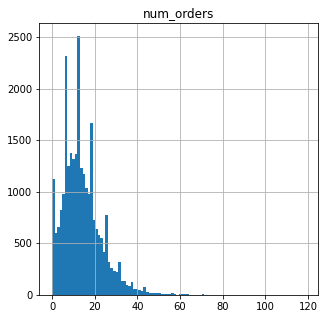

In [6]:
# с помощью функции 'hist' построим общую гистограмму
df.hist(figsize=(5, 5), bins=100);

**5. Посмотрим статистическую информацию по каждому числовому столбцу таблицы, в датафрейме `df`.**

In [7]:
# выведем статистическую информацию
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


**6. Создадим глобальную переменную для хранения размера исходного датасета.**

In [8]:
DF_SOURCE_SIZE = df.shape[0]

**Выводы**

Предварительно можно утверждать, что данных достаточно для исследования. Возможно, есть аномальные значения (артефакты), дубликаты (явные/неявные) и выбросы в данных. Столбцы: `datetime`, `num_orders`, содержат неподходящий тип данных.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Проверим данные на артефакты (аномалии), дубликаты (явные/неявные), выбросы и, при нахождении, исправим. Проверим данные на несоответствие типу и, при нахождении, изменим тип.

### Изменение типов данных

**7. Посмотрим существующие типы данных для всех столбцов.**

In [9]:
# выводим список всех столбцов таблицы и их типы
df.dtypes

datetime      object
num_orders     int64
dtype: object

Изменение типов данных, требуется для:

* `datetime` с типа `object` на тип `datetime64`;
* `num_orders` с типа `int64` на тип `int32`.

**8. Заменим строковый тип данных `object`,  в столбце `datetime`,  на тип данных `datetime64`.**

In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])

**9. Заменим целочисленный тип данных `int64`,  в столбце `num_orders`,  на целочисленный тип данных `int32`.**

In [11]:
df['num_orders'] = df['num_orders'].astype('int32')

**10. Проверим результат преобразования типов.**

In [12]:
# выводим список всех столбцов таблицы и их типы
df.dtypes

datetime      datetime64[ns]
num_orders             int32
dtype: object

### Обработка выбросов

In [13]:
# функция вычисления левой и правой границы (левое и правое "крайние" значения данных) [на диаграмме размаха]
# параметр 'feature' - признак (столбец из датафрейма)
def left_right_extreme_data_boundary(feature):
    
    if(feature.empty):
        return np.nan, np.nan
    
    # вычислим квантили q3 (75%-й) и q1 (25% -й)
    q3, q1 = np.percentile(feature, [75,25])
    
    # вычислим межквантильный интервал iqr
    iqr = q3 - q1

    # рассчитаем левую и правую границу (левое и правое "крайние" значения данных)
    return np.around((q1 - iqr * 1.5), decimals=3), np.around((q3 + iqr * 1.5), decimals=3)



# функция обработки выбросов в одном признаке
def outlier_handling_in_feature(dataframe,
                                column_name,
                                min_range_limit,
                                max_range_limit):
    
    # удалим из датасета выбросы 'dataframe', из столбца 'column_name', выбросы
    dataframe = dataframe[~(dataframe[column_name] < min_range_limit) &
                          ~(dataframe[column_name] > max_range_limit)]
    
    return dataframe



def check_in_outlier(features, column_names):
    
    for column_name in column_names:
        left_border, right_border = left_right_extreme_data_boundary(features[column_name].fillna(0))
        
        if ( (left_border > features[column_name].min()) or
             (right_border < features[column_name].max()) ):
            return False
        
    return True


# функция обработки выбросов в одном датафрейме
def outlier_handling(features, column_names):
    
    work = True;
    while(work):
        for column_name in column_names:
        
            left_border, right_border = left_right_extreme_data_boundary(features[column_name].fillna(0))
        
        
            features = outlier_handling_in_feature(features,
                                                   column_name,
                                                   left_border,
                                                   right_border)
        
        if (features.empty or check_in_outlier(features, column_names)):
            break
    
    return features

**11. Проверим датасет: `df`, на наличие выбросов.**

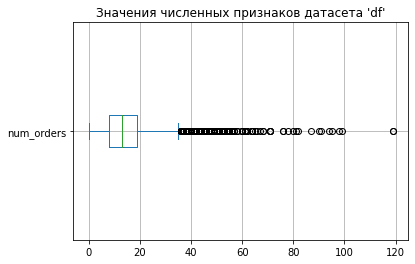

In [14]:
# построим диаграмму размаха для датафрейма 'df', чтобы проверить признаки на наличие выбросов
df.plot(kind='box',
        vert=False,
        title='Значения численных признаков датасета \'df\'',
        grid=True);

**12. Удалим выбросы в целевом признаке `num_orders`.**

In [15]:
# удалим выбросы в целевом признаке датафрейма 'df'
df_without_outlier = outlier_handling(df, ['num_orders'])

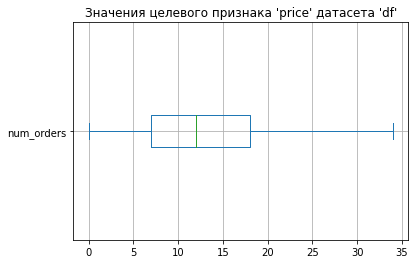

In [16]:
# проверим результат удаления выбросов в целевом признаке `num_orders`
df_without_outlier['num_orders'].plot(kind='box',
                                 vert=False,
                                 title='Значения целевого признака \'price\' датасета \'df\'',
                                 grid=True);

### Обработка дубликатов

**13. Проверим датафрейм `df_without_outlier` на наличие дубликатов.**

In [17]:
# проверяем количество строк дубликатов в 'df_without_outlier'
df_without_outlier.duplicated().sum()

0

Дубликаты отсутствуют.

### Обработка аномальных значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке.

Обработаем аномальные значения, только в тех признаках, которые будут использованы для обучения моделей и предсказаний.

**14. Проверим аномальные значения в признаке `datetime`.**

In [18]:
df_without_outlier['datetime'].min()

Timestamp('2018-03-01 00:00:00')

In [19]:
df_without_outlier['datetime'].max()

Timestamp('2018-08-31 23:30:00')

In [20]:
len(df_without_outlier['datetime'].unique())

25717

In [21]:
df_without_outlier.shape

(25717, 2)

Аномальные значения отсутствуют.

**15. Проверим аномальные значения в признаке `num_orders`.**

In [22]:
df_without_outlier['num_orders'].min()

0

In [23]:
df_without_outlier['num_orders'].max()

34

In [24]:
df_without_outlier['num_orders'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34], dtype=int32)

Аномальные значения отсутствуют.

**16. Проверим, какая доля исходного датасета осталась после фильтрации.**

In [25]:
# рассчитаем размер доли исходного датасета 'df', которая осталась после фильтрации, в процентах
(df_without_outlier.shape[0] / DF_SOURCE_SIZE) * 100

97.05993357487924

Размер доли исходного датасета, которая осталась после фильтрации: 

* `df_without_outlier` - **`97.05%`**.

**Выводы**

1. Предобработка обнаружила следующие проблемы в данных:

- несоответствие типа значений хранимым данным;
- выбросы.

2. Преобразовали типы данных из одного в другой, где это было необходимо.
3. Обработали выбросы, где это было необходимо.

После такой предобработки данных, исследование станет более точным.

Теперь можно перейти к анализу данных. 

## Анализ данных

**17. Установим индекс таблицы равным столбцу `datetime`.**

In [26]:
df_without_outlier.set_index('datetime', inplace=True)

**18. Проверим, в хронологическом порядке  расположены дата и время или нет.**

In [27]:
df_without_outlier.index.is_monotonic_increasing

True

**19. Построим график временного ряда датафрейма `df_without_outlier`.**

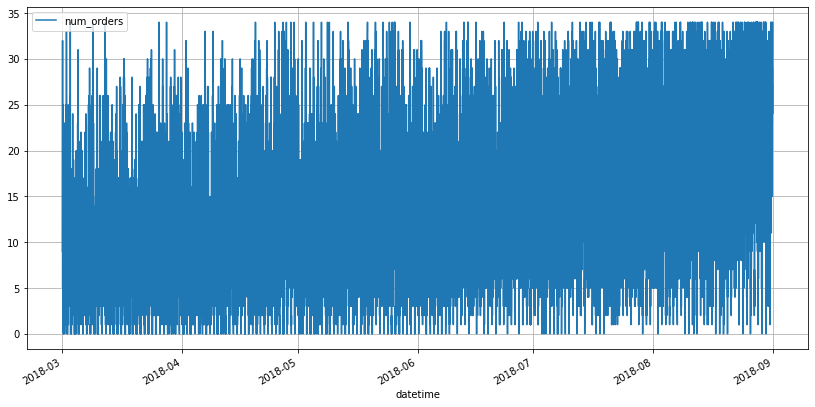

In [28]:
df_without_outlier.plot(grid=True, legend=True, figsize=(14, 7));

**20. Сделаем ресемплирование данных по одному часу.**

In [29]:
df_without_outlier = df_without_outlier.resample('1H').sum()

# сделаем копию датафрейма 'df_without_outlier' для анализа данных
df_analisys = df_without_outlier.copy()

In [30]:
df_analisys.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


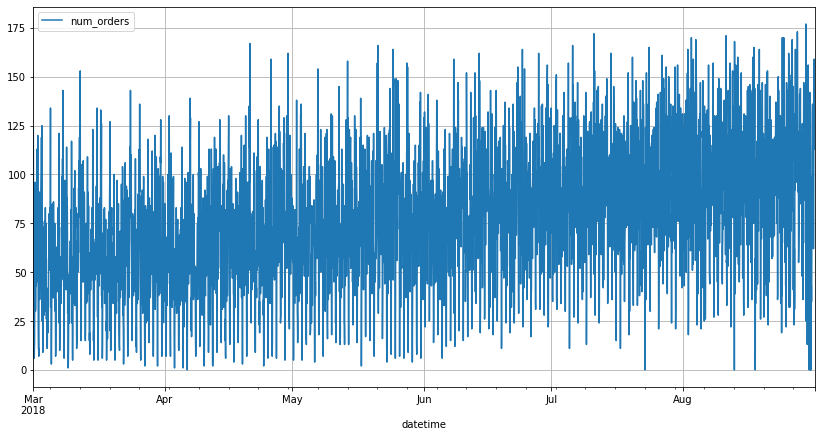

In [31]:
df_analisys.plot(figsize=(14,7), grid=True);

**21. Добавим метод сглаживания временных рядов - скользящее среднее, в датафрейм `df`.**

In [32]:
df_analisys['rolling_mean'] = df_analisys.rolling(10).mean()

In [33]:
df_analisys.head(11)

,num_orders,rolling_mean
datetime,,
2018-03-01 00:00:00,124,NaN
2018-03-01 01:00:00,85,NaN
2018-03-01 02:00:00,71,NaN
2018-03-01 03:00:00,66,NaN
2018-03-01 04:00:00,43,NaN
2018-03-01 05:00:00,6,NaN
2018-03-01 06:00:00,12,NaN
2018-03-01 07:00:00,15,NaN
2018-03-01 08:00:00,34,NaN


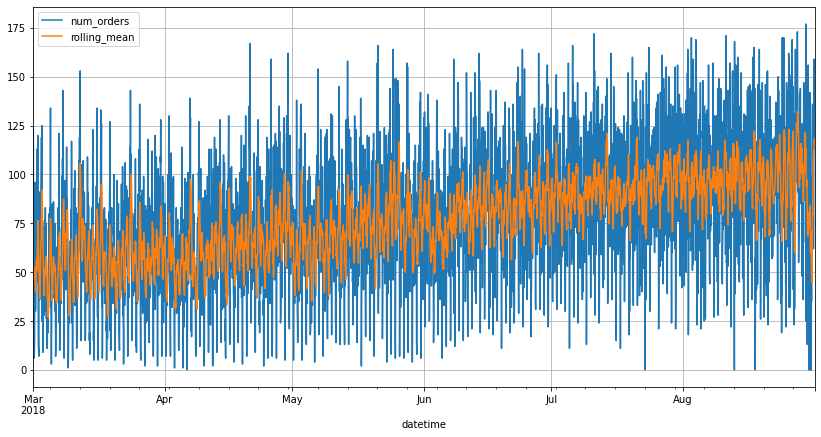

In [34]:
df_analisys.plot(figsize=(14,7), grid=True);

In [35]:
# вернём датасет в состояние до применения метода слгаживания
df_analisys.drop(['rolling_mean'], axis=1, inplace=True)

**21. Проанализируем треды, сезонность и остаток.**

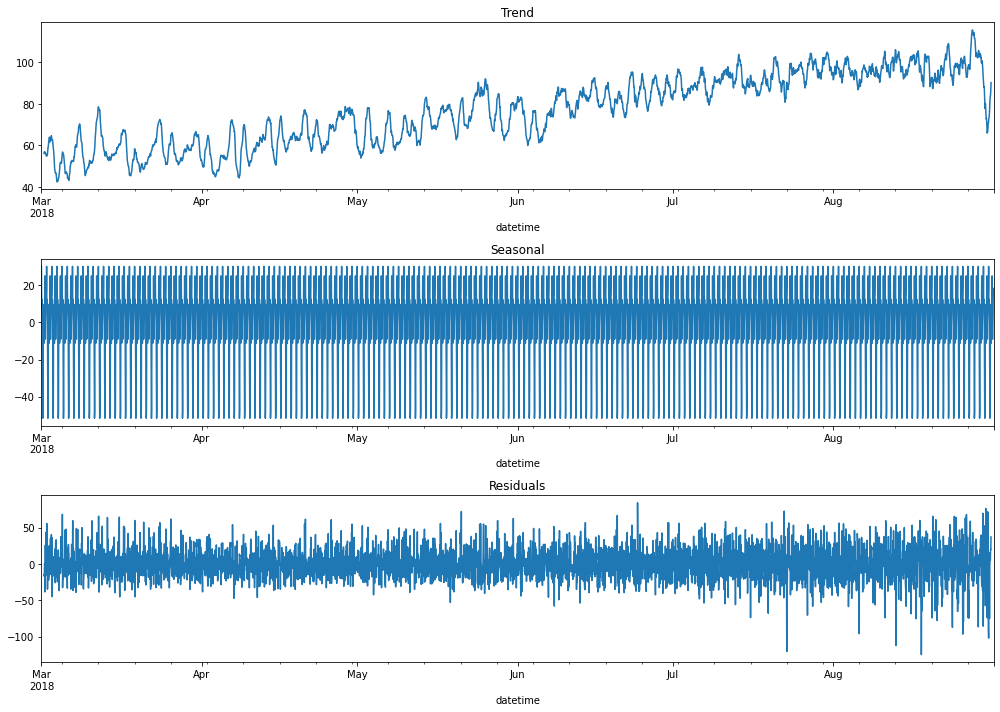

In [36]:
decomposed = seasonal_decompose(df_analisys)

plt.figure(figsize=(14, 10))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonal')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

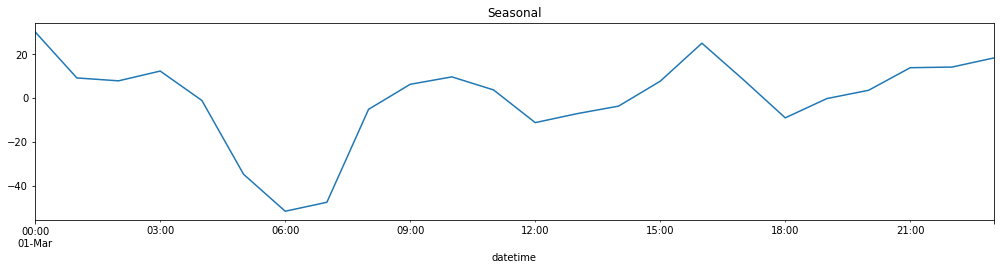

In [37]:
# посмотрим сезонность на промежутке с 2018-03-01 по 2018-03-07 
plt.figure(figsize=(14, 10))

plt.subplot(312)
decomposed.seasonal['2018-03-01':'2018-03-01'].plot(ax=plt.gca())
plt.title('Seasonal')

plt.tight_layout()

По первому графику видно, что с марта 2018 по конец августа 2018, среднее количество заказов плавно росло, без повторяющихся закономерностей. У текущего временного ряда есть восходящий тренд.
О ежегодных закономерностях и сезонности, невозможно что-то сказать, из-за ограниченного масштаба представленных данных (данные представлены только за период с 2018-03-01 по 2018-08-31 включительно).

По графику сезонности, на более коротком промежутке (за неделю в марте) видно, что минимальное количество заказов в 06:00, после чего они начинают резко увеличиваться. В течение дня наблюдается как спад, так и рост. Пик заказов приходится на 16:00 и 00:00.

**22. Проверим, какой у нас текущий временной ряд, стационарный или нестационарный.**

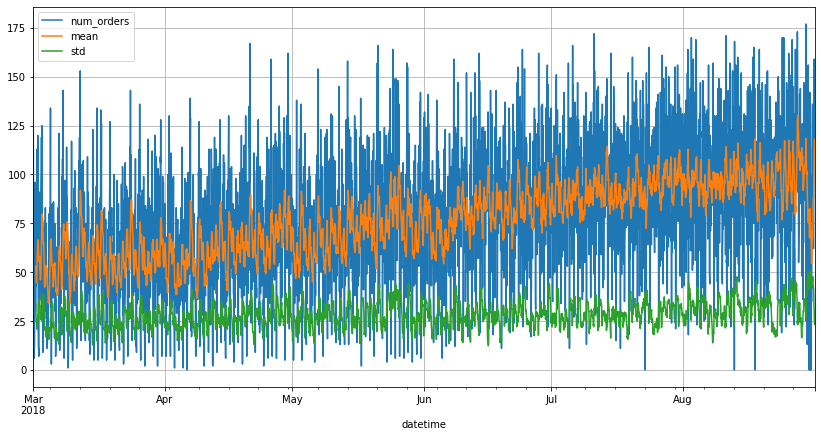

In [38]:
# найдем скользящее стандартное отклонение
df_analisys['mean'] = df_analisys['num_orders'].rolling(15).mean()
df_analisys['std'] = df_analisys['num_orders'].rolling(15).std()
df_analisys.plot(figsize=(14,7), grid=True);

Текущий временной ряд - нестационарный.

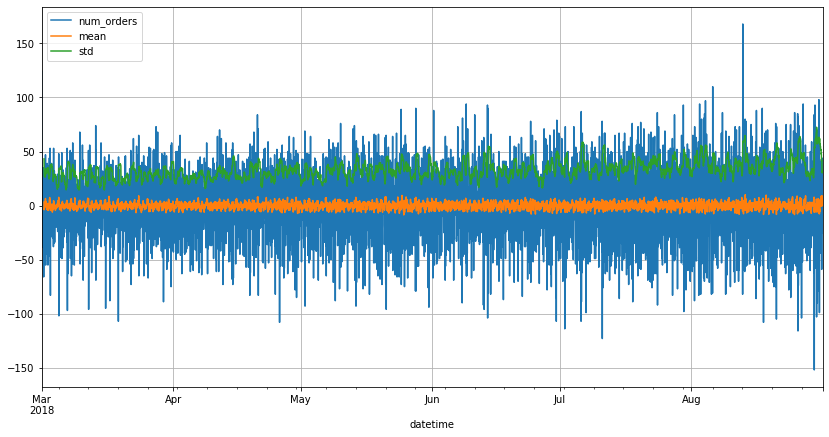

In [39]:
# вернём датасет в состояние до применения скользящее стандартное отклонение
df_analisys.drop(['mean', 'std'], axis=1, inplace=True)

# преобразуем наш временной ряд в стационарный
df_analisys -= df_analisys.shift(fill_value=0)
df_analisys['mean'] = df_analisys['num_orders'].rolling(15).mean()
df_analisys['std'] = df_analisys['num_orders'].rolling(15).std()
df_analisys.plot(figsize=(14,7), grid=True);

**Выводы**

1. У текущего временного ряда есть восходящий тренд. Анализ показал, что среднее количество заказов, с марта 2018 по конец августа 2018, плавно росло.
2. График сезонности, на более коротком промежутке (за неделю в марте) показал, что минимальное количество заказов в 06:00. В течение дня наблюдается как спад, так и рост. Пик заказов приходится на 16:00 и 00:00.
3. Масштаб данных очень ограничен. Из-за этого сложно сделать более глубокий анализ данных.
4. Текущий временной ряд - нестационарный.

На этапе подготовки данных для исследования, необходимо учесть факт, что текущий временной ряд - нестационарный.

## Подготовка данных для исследования

**23. Определим функцию создания признаков для горизонта прогнозирования.**

Нам необходимо определить функцию, которая сможет создавать три типа признаков: календарные (calendar features), "отстающие значения" (lag features), скользящее среднее (rolling mean features).

In [40]:
def make_features(data, feature_name, max_lag, rolling_mean_size):
    
    temp_df = data.copy()
    temp_df['year']   = temp_df.index.year
    temp_df['month']     = temp_df.index.month
    temp_df['day']       = temp_df.index.day
    temp_df['dayofweek'] = temp_df.index.dayofweek

    for lag in range(1, max_lag + 1):
        temp_df['lag_{}'.format(lag)] = temp_df[feature_name].shift(lag)

    temp_df['rolling_mean'] =\
        temp_df[feature_name].shift().rolling(rolling_mean_size).mean()
    
    return temp_df

**24. Создадим новый датафрейм для обучения модели (ml - machine learning).**

In [41]:
df_ml = df_without_outlier.copy()
df_ml.shape

(4416, 1)

**25. Создадим признаки для горизонта прогнозирования.**

In [42]:
# определим константы - настроечные параметры функции создания признаков, для горизонта прогнозирования
MAX_LAG = 5
ROLLING_MEAN_SIZE = 1

In [43]:
# создадим признаки
df_ml = make_features(df_ml, 'num_orders', MAX_LAG, ROLLING_MEAN_SIZE)

# проверим создание признаков
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4416 non-null   int32  
 1   year          4416 non-null   int32  
 2   month         4416 non-null   int32  
 3   day           4416 non-null   int32  
 4   dayofweek     4416 non-null   int32  
 5   lag_1         4415 non-null   float64
 6   lag_2         4414 non-null   float64
 7   lag_3         4413 non-null   float64
 8   lag_4         4412 non-null   float64
 9   lag_5         4411 non-null   float64
 10  rolling_mean  4415 non-null   float64
dtypes: float64(6), int32(5)
memory usage: 327.8 KB


**26. Cоздадим переменную `random_state` для фиксации псевдослучайности.**

In [44]:
# создадим переменную 'random_state' для фиксации псевдослучайности для алгоритма обучения
# и других алгоритмов в нашем проекте
random_state = 753

**27. Разделим исходные данные на две выборки: обучающую и тестовую.**

In [45]:
# разделим набор данных на обучающую выборку (90%) и тестовую (10%)
# для этого мы установим параметр 'test_size' = 0.1
train, test = train_test_split(df_ml, test_size=0.1, shuffle=False)

In [46]:
train.shape

(3974, 11)

In [47]:
test.shape

(442, 11)

### Устранение пропусков

**28. Выведем количество пропущенных значений для каждого столбца, используя комбинацию двух методов.**

In [48]:
# посчитаем количество пропусков, по каждому столбцу в отдельности, в обучающей выборке
train.isna().sum()

num_orders      0
year            0
month           0
day             0
dayofweek       0
lag_1           1
lag_2           2
lag_3           3
lag_4           4
lag_5           5
rolling_mean    1
dtype: int64

In [49]:
# удалим пропуски в обучающей выборке
train.dropna(inplace=True)

Выводы

Данные пропуски, появились в созданных признаках, на этапе их создания.

**29. Создадим отдельные датафреймы с признаками и целевым признаком.**

Создадим отдельные датафреймы с признаками и целевым признаком, для обучающей и тестовой выборок.

In [50]:
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']

features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [51]:
features_train.shape

(3969, 10)

In [52]:
target_train.shape

(3969,)

In [53]:
features_test.shape

(442, 10)

In [54]:
target_test.shape

(442,)

**30. Масштабируем численные признаки.**

Масштабируем численные признаки с разным разбросом значений, методом стандартизации данных, в каждой полученой выборке множества признаков: обучающей и тестовой.

In [55]:
# определим функцию стандартизации признаков
def features_standardization(features_train, features_test, column_names):
    
    # создадим объект класса 'StandardScaler' и настроим объект на обучающих данных
    scaler = StandardScaler()
    
    # масштабируем признаки
    features_train[column_names] = scaler.fit_transform(features_train[column_names])
    features_test[column_names] = scaler.transform(features_test[column_names])
    
    return features_train, features_test

In [56]:
features_train.describe()

,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean
count,3969.0,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000,3969.000000
mean,2018.0,5.230789,15.137566,3.025699,74.578231,74.571681,74.553288,74.535399,74.532124,74.578231
std,0.0,1.577836,8.871178,2.002731,32.732812,32.731926,32.713408,32.688262,32.682653,32.732812
min,2018.0,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.0,4.000000,7.000000,1.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
50%,2018.0,5.000000,15.000000,3.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
75%,2018.0,7.000000,23.000000,5.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
max,2018.0,8.000000,31.000000,6.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000


In [57]:
features_test.describe()

,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean
count,442.0,442.0,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,2018.0,8.0,22.285068,2.823529,97.341629,97.246606,97.212670,97.296380,97.298643,97.341629
std,0.0,0.0,5.326118,1.883353,35.294723,35.252318,35.199915,35.295711,35.298230,35.294723
min,2018.0,8.0,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.0,8.0,18.000000,1.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
50%,2018.0,8.0,22.000000,3.000000,103.000000,102.500000,102.500000,102.500000,102.500000,103.000000
75%,2018.0,8.0,27.000000,4.000000,121.750000,121.000000,121.000000,121.750000,121.750000,121.750000
max,2018.0,8.0,31.000000,6.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000


In [58]:
numerical_features = features_train.columns

In [59]:
# масштабируем численные признаки 
features_train, features_test = features_standardization(features_train, features_test, numerical_features)

In [60]:
features_train.describe()

,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean
count,3969.0,3.969000e+03,3.969000e+03,3.969000e+03,3.969000e+03,3969.000000,3.969000e+03,3.969000e+03,3.969000e+03,3.969000e+03
mean,0.0,1.145748e-16,-7.160925e-18,-2.774858e-17,8.593109e-17,0.000000,-5.728740e-17,1.718622e-16,8.593109e-17,8.593109e-17
std,0.0,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00,1.000126,1.000126e+00,1.000126e+00,1.000126e+00,1.000126e+00
min,0.0,-1.414006e+00,-1.593852e+00,-1.510977e+00,-2.278681e+00,-2.278542,-2.279270e+00,-2.280476e+00,-2.280767e+00,-2.278681e+00
25%,0.0,-7.801469e-01,-9.174194e-01,-1.011596e+00,-6.898606e-01,-0.689679,-6.895072e-01,-6.894903e-01,-6.895084e-01,-6.898606e-01
50%,0.0,-1.462875e-01,-1.550904e-02,-1.283368e-02,-1.766741e-02,-0.017468,-1.691532e-02,-1.638101e-02,-1.628359e-02,-1.766741e-02
75%,0.0,1.121431e+00,8.864014e-01,9.859284e-01,6.850800e-01,0.685299,6.862489e-01,6.873241e-01,6.875423e-01,6.850800e-01
max,0.0,1.755291e+00,1.788312e+00,1.485309e+00,2.976648e+00,2.976928,2.979176e+00,2.982015e+00,2.982627e+00,2.976648e+00


In [61]:
features_test.describe()

,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean
count,442.0,4.420000e+02,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.0,1.755291e+00,0.805801,-0.100960,0.695518,0.692834,0.692751,0.696392,0.696681,0.695518
std,0.0,6.668886e-16,0.600460,0.940511,1.078403,1.077137,1.076144,1.079903,1.080166,1.078403
min,0.0,1.755291e+00,-0.240987,-1.510977,-2.278681,-2.278542,-2.279270,-2.280476,-2.280767,-2.278681
25%,0.0,1.755291e+00,0.322707,-1.011596,0.012887,0.013087,0.013657,0.014215,0.014318,0.012887
50%,0.0,1.755291e+00,0.773663,-0.012834,0.868405,0.853352,0.854397,0.855601,0.855849,0.868405
75%,0.0,1.755291e+00,1.337357,0.486547,1.441297,1.418620,1.419985,1.444572,1.444920,1.441297
max,0.0,1.755291e+00,1.788312,1.485309,3.129419,3.129704,3.132037,3.134994,3.135632,3.129419


**Выводы**

1. Мы создали:
   - функцию создания признаков для горизонта прогнозирования;
   - новый датафрейм для обучения модели (ml - machine learning), посредством удаления избыточных признаков из множества признаков;
   - две константы `MAX_LAG` и `ROLLING_MEAN_SIZE`, которые являются  настроечными параметрами функции создания признаков для горизонта прогнозирования;
   - признаки в датафрейме df_ml, для горизонта прогнозирования;
   - отдельные датафреймы, выборки: обучающую и тестовую;
   - отдельные датафреймы, содержащие признаки и целевой признак для каждой выборки: обучающей и тестовой.

2. Удалили пропуски в обучающей выборке.
3. Масштабировали признаки для каждой выборки множества признаков: обучающей и тестовой.

## Исследование моделей <a id='models_research'></a>

Для задачи регрессии мы рассмотрим четыре популярные модели: решающее дерево, случайный лес, линейная регрессия и градиентный бустинг.

Оценка качества моделей, будет производиться с использованием метода кросс-валидации.

In [62]:
# функция для исследования модели (поиск лучших гиперпараметров при лучшем значении метрики качества)
def model_research(model,
                   features,
                   target,
                   param_grid,
                   scoring='neg_root_mean_squared_error',
                   n_jobs=-1):
    
    tscv = TimeSeriesSplit()
    
    search = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring=scoring,
                          n_jobs=n_jobs,
                          cv=tscv)

    search.fit(features, target)
    
    print("Лучшие параметры (CV score=%0.3f):" % -search.best_score_)
    print(search.best_params_)
    
    return search

**31. Исследуем модель на основе "решающего дерева".**

In [63]:
%%time
dtr_model = DecisionTreeRegressor(random_state=random_state)

'''
param_grid = { 'splitter'  : ['random'],
               'max_depth' : [10] }         
'''

param_grid = { 'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
               'splitter'  : ['best', 'random'],
               'max_depth' : range(10, 22, 1) }


print("=========== Решающее дерево (обучающая выборка) ==========")
# найдем лучшие гиперпараметры, на обучающей выборке
gscv_dtr = model_research(dtr_model, features_train, target_train, param_grid)

print("RMSE:", -gscv_dtr.best_score_)
print("==========================================================")

=========== Решающее дерево (обучающая выборка) ==========
Лучшие параметры (CV score=33.138):
{'criterion': 'friedman_mse', 'max_depth': 10, 'splitter': 'random'}
RMSE: 33.13789233170845
CPU times: user 18.9 s, sys: 17.6 ms, total: 18.9 s
Wall time: 19 s


Лучший результат модели на основе "решающего дерева", на обучающей выборке:
 - метрика RMSE: **33.13789233170845**;
 - при гиперпараметрах модели:
   * `criterion` - **friedman_mse**;
   * `splitter`  - **random**;
   * `max_depth` -  **10**.

**32. Исследуем модель на основе "случайного леса".**

In [ ]:
%%time

rfr_model = RandomForestRegressor(random_state=random_state, n_jobs=-1)

'''
param_grid = { 'criterion' : ['absolute_error'],
               'n_estimators' : [130],
               'max_depth'    : [11] }
'''

param_grid = { 'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
               'n_estimators' : range(50, 150, 10),
               'max_depth' : range(10, 22, 1) }


print("=========== Cлучайный лес (обучающая выборка) ============")
# найдем лучшие гиперпараметры, на обучающей выборке
gscv_rfr = model_research(rfr_model, features_train, target_train, param_grid)

print("RMSE:", -gscv_rfr.best_score_)
print("==========================================================")

=========== Cлучайный лес (обучающая выборка) ============


Лучший результат модели на основе "случайного леса", на обучающей выборке:
 - метрика RMSE: **27.571625386024984**;
 - при гиперпараметрах модели:
   * `criterion` - **absolute_error**;
   * `n_estimators` - **130**;
   * `max_depth`    -  **11**.

**33. Исследуем модель на основе "линейной регрессии".**

In [ ]:
%%time
lr_model = LinearRegression(n_jobs=-1)

param_grid = { }

print("=========== Линейная регрессия (обучающая выборка) ============")
# найдем лучшие гиперпараметры, на обучающей выборке
gscv_lr = model_research(lr_model, features_train, target_train, param_grid)

print("RMSE:", -gscv_lr.best_score_)
print("==========================================================")

Лучший результат модели на основе "линейной регрессии", на обучающей выборке:
 - метрика RMSE: **27.73990862975226**.

**34. Исследуем модель на основе "градиентного бустинга" - LightGBM.**

In [ ]:
%%time

gbm_model = lgb.LGBMRegressor(random_state=random_state, n_jobs=-1)

'''
param_grid = { 'n_estimators' : [100],
               'max_depth' : [11] }
'''

param_grid = { 'n_estimators' : range(50, 150, 10),
               'max_depth' : range(10, 22, 1) }


print("=========== Градиентный бустинг (обучающая выборка) ============")
# найдем лучшие гиперпараметры, на обучающей выборке
gscv_gbm = model_research(gbm_model, features_train, target_train, param_grid)

print("RMSE:", -gscv_gbm.best_score_)
print("==========================================================")

Лучший результат модели на основе "градиентного бустинга", на обучающей выборке:
 - метрика RMSE: **28.28609724532246**;
   - при гиперпараметрах модели: 
   * `n_estimators`  - **100**;
   * `max_depth`     - **11**.

**35. Построим константную модель (`baseline` модель) и проверим её.**

Данная модель машинного обучения позволит нам проконтролировать, что наши более сложные модели дают нам прирост качества прогнозирования.

In [ ]:
%%time
dr_model = DummyRegressor(strategy='median')

param_grid = {}

print("==== Dummy регрессия (baseline) (обучающая выборка) ======")
# найдем лучшие гиперпараметры, на обучающей выборке
gscv_dr = model_research(dr_model, features_train, target_train, param_grid)

print("RMSE:", -gscv_dr.best_score_)
print("==========================================================")

Лучший результат модели на основе "Dummy регрессии", на обучающей выборке:
 - метрика RMSE: **34.859431904832924**.

**Общие выводы**


Все рассматриваемые модели, абсолютно адекватны. Они показали результат лучше, чем наша `Dummy`(baseline) модель.

Лучшая модель, на обучающей выборке, по метрике качества `RMSE` : `RandomForestRegressor` ("случайный лес").

`RMSE` --  **27.571625386024984**, при гиперпараметрах модели:
   * `criterion` - **absolute_error**;
   * `n_estimators` - **130**;
   * `max_depth`    -  **11**.

## Тестирование модели

In [ ]:
# функция инкапсулирующая предсказание и вычисление RMSE этого предсказания для абстрактной модели
def model_testing(gscv, features, target, model_name):
    
    print(f"=========== {model_name} (тестовая выборка) ============")
    predictions = gscv.predict(features)
    print("RMSE:", mean_squared_error(target, predictions, squared=False))
    print("==========================================================")

**36. Проверим качество выбранной модели на тестовой выборке.**

Модель: "Случайный лес".

In [ ]:
# получим предсказание и вычислим его RMSE
model_testing(gscv_rfr, 
              features_test,
              target_test,
              'Cлучайный лес')

**37. Проверим качество других моделей на тестовой выборке.**

Модели: решающее дерево; линейная регрессия, градиентный бустинг, dummy.

In [ ]:
# получим предсказание и вычислим его RMSE
model_testing(gscv_dtr, 
              features_test,
              target_test,
              'Решающее дерево')

In [ ]:
# получим предсказание и вычислим его RMSE
model_testing(gscv_lr, 
              features_test,
              target_test,
              'Линейная регрессия')

In [ ]:
# получим предсказание и вычислим его RMSE
model_testing(gscv_gbm, 
              features_test,
              target_test,
              'Градиентный бустинг')

In [ ]:
# получим предсказание и вычислим его RMSE
model_testing(gscv_dr, 
              features_test,
              target_test,
              'Dummy регрессия')

**Выводы**

 - Значение метрики: `RMSE` (минимальная ошибка), на тестовой выборке, модели `RandomForestRegressor` : **34.71709262773364**, не существенно отличаеся от значения `RMSE` полученной на обучающей выборке: **27.571625386024984**.

In [ ]:
# построим график сравнения количества заказов на реальных и предсказанных данных, на тестовой выборке
(pd.concat([target_test,
            pd.Series(gscv_rfr.predict(features_test), index=target_test.index, name=target_test.name)],
           axis=1)
    .plot(grid=True,
          legend=True,
          figsize=(17, 7),
          xlabel='Дата и время',
          ylabel='Количество заказов',
          title='Количество заказов такси на определённую дату и время (тестовые данные).'))

plt.legend(['Реальные', 'Предсказаные'], loc='upper left', title='Заказы');

## Итоги проекта

1. Лучшая модель по критерию `RMSE` : `RandomForestRegressor`.

2. Показатели качества модели, на тестовой выборке:
- `RMSE`:   **34.71709262773364** (минимальная ошибка);

Гиперпараметры модели:
   * `criterion` - **absolute_error**;
   * `n_estimators` - **130**;
   * `max_depth`    -  **11**.

3. Критерии качества прогнозирования модели, полученные на обучающей выборке, несущественно отличаются от критериев полученных на тестовой выборке, что говорит об устойчивости модели к новым входным данным.

    
*Рекомендации по улучшению модели*:
   - собрать большой массив исходных данных, за более продолжительный период времени (от трех лет и более), для обучения модели;
   - обучить модель на большом массиве данных;
   - скорректировать гиперпараметры.